> # About Me
*Hello, everyone! I am Kunal Kevat, a passionate Data Analyst with an MBA in Business Analytics. With expertise in Data Science & Analytics, SQL, Python, R, and Microsoft 365, I strive to uncover insights from data and transform them into actionable business strategies. I am also skilled in Power BI, which allows me to create compelling visualizations and dashboards.*


> # INTRODUCTION

**Project Overview**

*The restaurant industry plays a crucial role in shaping the culinary landscape of a region it's not just about food, but also reflects our culture and how we live. With more people moving to cities and changing how they live, the demand for eating out has gone way up.
This study helps to find out details about india, we using various tools. to understand everything from what kind of people like food , how they are ready/willing to pay in restaurants & what service they expect from restaurants
We use the Zomato dataset to find out various insights. which helps to know consumer behaviour, restaurant industry growth.
First, we had to clean up the data because it was messy. We started with a huge dataset of over 200,000 rows and 26 columns, but after cleaning, we ended up with about 55,000 &26 columns unique restaurants. This makes sure our analysis is accurate and trustworthy.
The exploratory data analysis (EDA) employed a range of statistical and visual techniques, to find out patterns and trends that provide a holistic understanding of the Indian restaurant industry.
The analysis sheds light on the geographical distribution of restaurants. We also checks types of restaurant establishments, cuisine preferences, and pricing dynamics, offering valuable insights for restaurateurs, investors, and food enthusiasts alike.
By combining quantitative analysis with insights, this study aims to know the growth of restaurant industry in India, identify untapped opportunities, which type of restaurants are more profitable*



# **Libraries used**
* **Numpy** is used for mathematical or numerical computation, it works on Numpy can work on multidimensional data, which makes it suitable for every dataset available.
* **Pandas** - This library is built on top of NumPy and provides high-level data structures and tools for data analysis. The two primary data structures in Pandas are Series (one-dimensional) and DataFrames (two-dimensional), which are similar to spreadsheets and offer powerful ways to manipulate and analyze data.
* **Matplotlib**- This is a versatile library for creating static, animated, and interactive visualizations in Python. Matplotlib offers a wide variety of plots like line charts, scatter plots, bar charts, histograms, and more. It excels because of customization and allows for in-depth control over the look and feel of your visualizations.
* **Seaborn**- This library is built on top of Matplotlib and specifically designed for creating statistical graphics. Seaborn offers a higher-level interface compared to Matplotlib, making it easier to create attractive, informative visualizations for data exploration. It integrates seamlessly with pandas DataFrames, making it a popular choice for data scientists.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/zomato-restaurants-in-india/zomato_restaurants_in_India.csv


In [2]:
df=pd.read_csv("../input/zomato-restaurants-in-india/zomato_restaurants_in_India.csv")

> # Data Cleaning

In [3]:
df.head(2)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1


In [4]:
print(f"Number of Columns: {df.shape[1]} \nNumber of Rows: {df.shape[0]}")

Number of Columns: 26 
Number of Rows: 211944


In [5]:
# To check Redunant Data
df['res_id'].nunique()

55568

In [6]:
df.drop_duplicates(['res_id'],keep='first',inplace=True)

In [7]:
print(f"Number of Columns: {df.shape[1]} \nNumber of Rows: {df.shape[0]}")

Number of Columns: 26 
Number of Rows: 55568


* After removing duplicates res_id from dataset  , no we have 55568 unique rows out of 211944 rows 

In [8]:
#now set the res_id as index
df.set_index('res_id',inplace=True)

In [9]:
#use to check datatype and nonnull values
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 55568 entries, 3400299 to 3201138
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  55568 non-null  object 
 1   establishment         55568 non-null  object 
 2   url                   55568 non-null  object 
 3   address               55550 non-null  object 
 4   city                  55568 non-null  object 
 5   city_id               55568 non-null  int64  
 6   locality              55568 non-null  object 
 7   latitude              55568 non-null  float64
 8   longitude             55568 non-null  float64
 9   zipcode               10945 non-null  object 
 10  country_id            55568 non-null  int64  
 11  locality_verbose      55568 non-null  object 
 12  cuisines              55098 non-null  object 
 13  timings               54565 non-null  object 
 14  average_cost_for_two  55568 non-null  int64  
 15  price_range     

""


In [10]:
df.describe().round(2)

,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,55568.00,55568.00,55568.00,55568.0,55568.00,55568.00,55568.00,55568.00,55568.00,55556.0,55568.00,55568.0
mean,3409.50,21.45,76.50,1.0,528.21,1.71,2.96,223.33,160.97,0.0,-0.35,-1.0
std,5174.94,42.90,10.98,0.0,595.03,0.88,1.46,618.22,586.98,0.0,0.93,0.0
min,1.00,0.00,0.00,1.0,0.00,1.00,0.00,-18.00,0.00,0.0,-1.00,-1.0
25%,8.00,16.52,74.65,1.0,200.00,1.00,2.90,6.00,1.00,0.0,-1.00,-1.0
50%,26.00,22.47,77.11,1.0,350.00,1.00,3.50,35.00,10.00,0.0,-1.00,-1.0
75%,11294.00,26.75,79.83,1.0,600.00,2.00,3.90,175.00,69.00,0.0,1.00,-1.0
max,11354.00,10000.00,91.83,1.0,30000.00,4.00,4.90,42539.00,17702.00,0.0,1.00,-1.0


In [11]:
df['establishment'].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [12]:
df['establishment'].nunique()

27

In [13]:
#Remove [''] Frrom establishment columns 
# Replace  [] to N/A

df['establishment']=df['establishment'].apply(lambda x:x[2:-2])
df['establishment']=df['establishment'].apply(lambda x : np.where(x=="", "NA", x))

In [14]:
df['establishment'].unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', 'NA', 'Shack', 'Club', 'Food Court',
       'Mess', 'Butcher Shop', 'Microbrewery', 'Cocktail Bar', 'Pop up',
       'Irani Cafe'], dtype=object)

In [15]:
df['establishment'].unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', 'NA', 'Shack', 'Club', 'Food Court',
       'Mess', 'Butcher Shop', 'Microbrewery', 'Cocktail Bar', 'Pop up',
       'Irani Cafe'], dtype=object)

In [16]:
df['establishment'].nunique()

27

In [17]:
df.columns

Index(['name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

# Result and Discussion

In [18]:
top_20 =df['city'].value_counts().head(20).reset_index()
top_20.head(3)

,city,count
0,Bangalore,2247
1,Mumbai,2022
2,Pune,1843


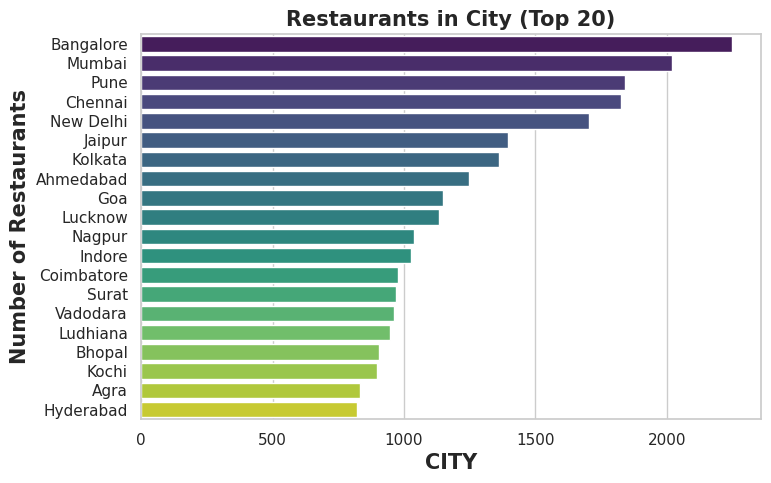

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(y='city',x='count',data=top_20,palette='viridis')
plt.title('Restaurants in City (Top 20)',fontsize=15,fontweight='bold')
plt.xlabel('CITY',fontsize=15,fontweight='bold')
plt.ylabel('Number of Restaurants',fontsize=15,fontweight='bold')
plt.show()

The bar graph showing the top 20 cities ranked by number of Restaurants ,here are some insights:

* Bangalore and Mumbai have the highest number of restaurants among the cities listed.
* There is a noticeable drop after Bangalore and Mumbai .in the number of restaurants for the next group of cities like Pune, Chennai, and New Delhi,Jabalpur
* The cities towards the bottom of the graph like Kochi, Agra, and Hyderabad have relatively fewer restaurants compared to the top cities.
* As you can see that metro cities have more number of restaurants than others with South India dominating the Top 4 (Bangalore, Pune , Mumbai, Chennai)


In [20]:
top_20=df['name'].value_counts().head(20).reset_index()

In [21]:
top_20.head()

,name,count
0,Domino's Pizza,399
1,Cafe Coffee Day,315
2,KFC,204
3,Baskin Robbins,202
4,Keventers,189


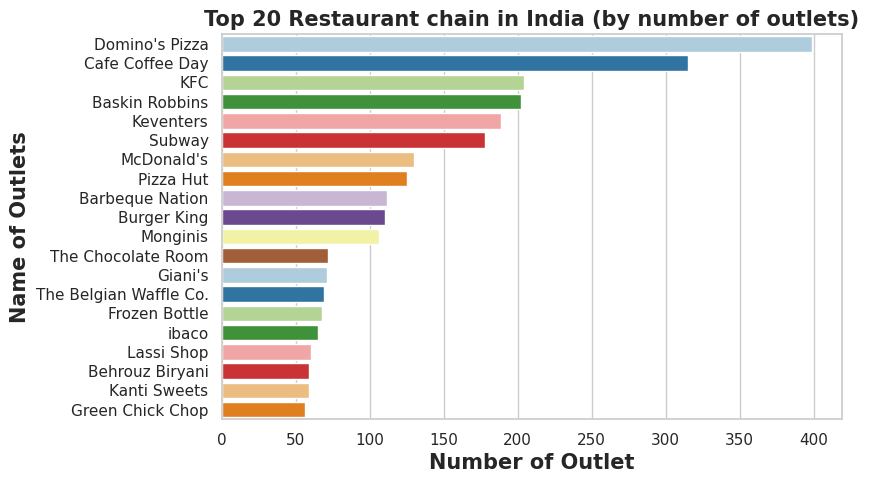

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(y='name',x='count',data=top_20,palette='Paired')
plt.title('Top 20 Restaurant chain in India (by number of outlets)',fontsize=15,fontweight='bold')
plt.xlabel('Number of Outlet',fontsize=15,fontweight='bold')
plt.ylabel('Name of Outlets',fontsize=15,fontweight='bold')
plt.show()

**The bar graph represents the top 20 restaurants chain in India. Based on number of outlets they operated. You can see in the figure Domino’s Pizza have highest number of outlets 390+ & Café Coffee Day (CCD) have 300+ outlets all over the India and KFC & Baskin Robbins have same size Bar.**
* Through this graphical visualization we can say that big giants like Domino’s, CCD, KFC are dominating the restaurant industry.
* consumers have a strong preference for certain types of cuisine, including 
1. Pizza : Chart is lead by the Domino’s. Number of outlets indicating the significance demand for pizza restaurants across India.

2.Burgers: Several burger chains are also in the top 20 McDonald's, Burger King, and Keventers suggesting that burger restaurants are popular among consumers.

1.Chicken-based restaurants: KFC (Kentucky Fried Chicken) ranks third in terms of the number of outlets, reflecting a consumer base for Non-veg restaurants in India.


In [23]:
by_establishment=df['establishment'].value_counts().head(7).reset_index()
by_establishment

,establishment,count
0,Quick Bites,14032
1,Casual Dining,12270
2,Café,4123
3,Bakery,3741
4,Dessert Parlour,3675
5,Sweet Shop,2615
6,Beverage Shop,2440


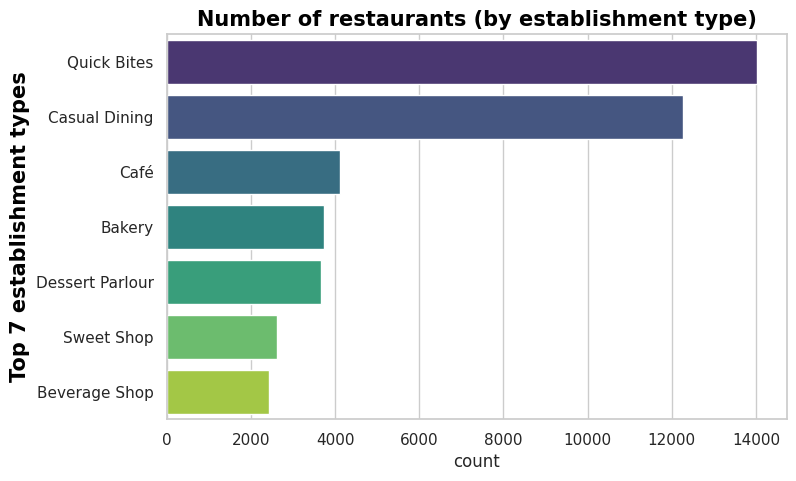

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(y='establishment',x='count',data=by_establishment,palette='viridis')
plt.title('Number of restaurants (by establishment type)',fontsize=15,fontweight='bold', color='black')
plt.ylabel("Top 7 establishment types",fontsize=15,fontweight='bold', color='black')
plt.show()

* The graph represents the Restaurants on basis of Establishment type. It shows the count (Number of Restaurants) falling under each category, in this figure we take top 7 establishment types Quick Bites, Casual Dining, Café, Bakery, Dessert Parlour, Sweet shops, Beverage Shop in decreasing order of count.

* You can see that quick Bites having around 14000+ and in Casual Dining having 12000+ are dominating. there is significant drop after casual dining and quick bites more than 66%.

* The graph provides a comparison of different types of restaurant establishments, highlighting the dominance of quick bites and casual dining options.


In [25]:
by_cusines=df['cuisines'].value_counts().head(10).reset_index()
by_cusines.head()

,cuisines,count
0,North Indian,4295
1,Fast Food,2025
2,"North Indian, Chinese",1636
3,Bakery,1585
4,South Indian,1489


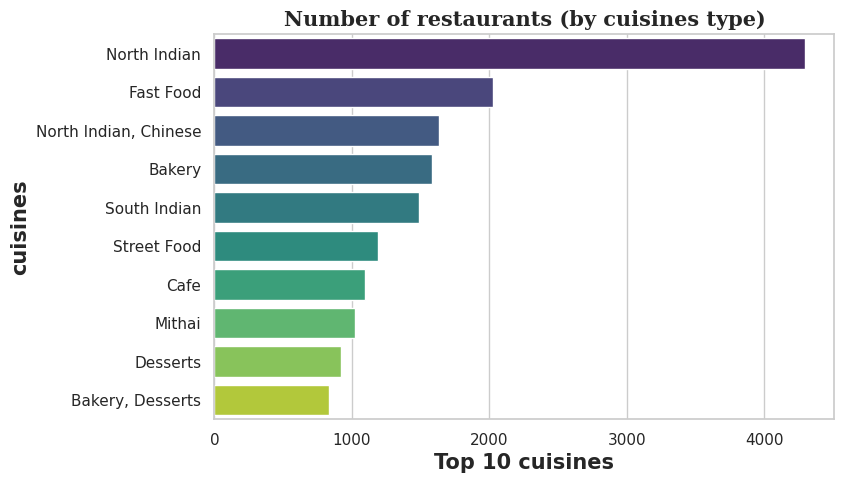

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(y='cuisines',x='count',data=by_cusines,palette='viridis')
plt.title('Number of restaurants (by cuisines type)',fontsize=15,fontweight='bold', fontfamily='serif')
plt.xlabel("Top 10 cuisines",fontsize=15,fontweight='bold')
plt.ylabel("cuisines" ,fontsize=15,fontweight='bold')
plt.show()

* The bar graph presents number of restaurants categorized by cuisines type they serve.
 
* The chart shows that North Indian cuisine has the highest number of restaurants around 4500+ which is followed by Fast Food 2000+ and a combination of North Indian 1800+, Chinese cuisines.
 
* Chinese food comes second in the list of cuisines that Indians prefer,more than fast food, desserts and South Indian food.
 
* Other notable categories include Bakery, South Indian, Street Food.
 

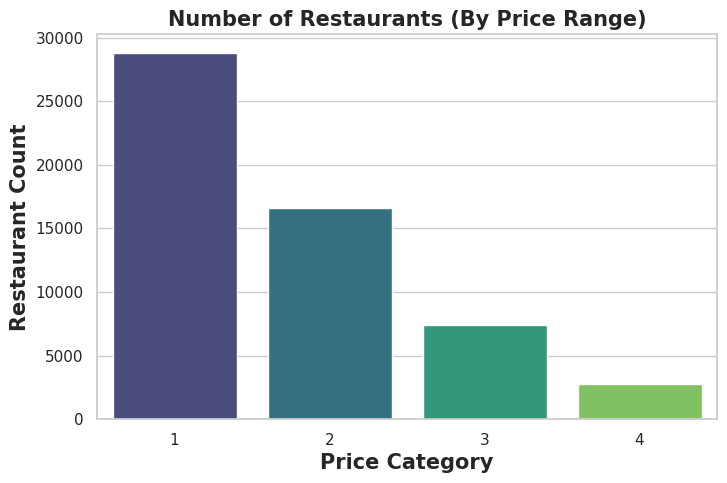

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x='price_range',data=df,palette='viridis')
plt.title('Number of Restaurants (By Price Range)',fontsize=15,fontweight='bold')
plt.xlabel('Price Category',fontsize=15,fontweight='bold')
plt.ylabel('Restaurant Count',fontsize=15,fontweight='bold')
plt.show()


In [28]:
#lets Find Price Range values 
p1=df[df['price_range']==1]['average_cost_for_two'].max()
p2=df[df['price_range']==2]['average_cost_for_two'].max()
p3=df[df['price_range']==3]['average_cost_for_two'].max()
p4=df[df['price_range']==4]['average_cost_for_two'].max()
p1min=df[df['price_range']==1]['average_cost_for_two'].min()
p2min=df[df['price_range']==2]['average_cost_for_two'].min()
p3min=df[df['price_range']==3]['average_cost_for_two'].min()
p4min=df[df['price_range']==4]['average_cost_for_two'].min()

#print(p1,p2,p3,p4)
#print(p1min,p2min,p3min,p4min)

In [29]:
#minimum Price for catgory assume Rs.50
prices=pd.DataFrame({ 'Price category':[1,2,3,4],
              'Price Range':['50-450','250-999','500-1900','1000-30000']},index=range(1,5))
prices

,Price category,Price Range
1,1,50-450
2,2,250-999
3,3,500-1900
4,4,1000-30000


* The graph displays a number of Restaurants categorized by Price Range Price category 1 (50-450) has the highest number of restaurants among the 4 categories around 28000+ restaurants are in category one price range .it shows the cosumer spending in restaurants all over the India.
* As you can see the sharp drop between category 1 and 2,3,4
* As the price range increases, the number of restaurants decreases, its indicating that fewer consumers are willing or able to spend higher amounts on dining out.
* The relatively small number of restaurants in the highest price range of 1,000-30,000 (category 4) implies that only a niche segment of consumers is willing to spend exorbitant amounts on dining experiences.
* Over all this graph shows the consumer spending habits in the restaurants, 50% of the restaurants are in category 1. majority of consumers gravitating towards more affordable dining options


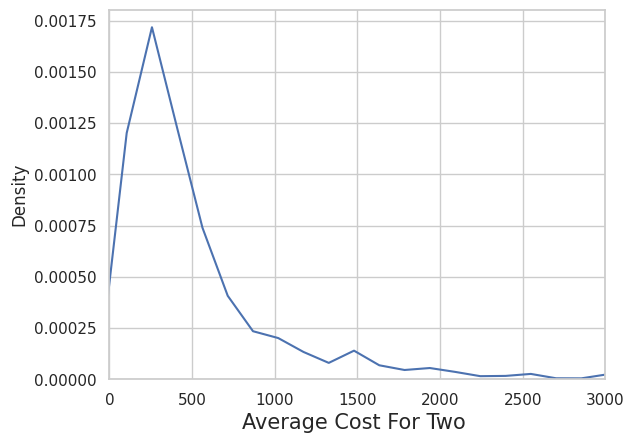

In [30]:
sns.kdeplot(df["average_cost_for_two"])
plt.xlim(0,3000)
plt.xlabel('Average Cost For Two ',fontsize=15)
plt.show()


**This KDE plot shows the distribution of average restaurant costs for two people. The single peak around 500- 600 indicates that most restaurants fall within that mid-range pricing for a meal for two. It means that most of the consumer prefer restaurant with mid range price.**

In [31]:
luxury=df.groupby(['name','establishment','city'])['average_cost_for_two'].max().sort_values(ascending=False).head(10).reset_index()
luxury

,name,establishment,city,average_cost_for_two
0,Ocean - The Private Dining Room - Sahara Star,Fine Dining,Mumbai,30000
1,Gol Bungalow - Taj Falaknuma Palace,Fine Dining,Hyderabad,15000
2,Bhairo,Fine Dining,Udaipur,15000
3,Fly Dining,Fine Dining,Bangalore,14000
4,Trophy Bar- Umaid Bhawan Palace,Bar,Jodhpur,12000
5,Pillars - Umaid Bhawan Palace,Fine Dining,Jodhpur,12000
6,Risala- Umaid Bhawan Palace,Fine Dining,Jodhpur,12000
7,Wasabi By Morimoto - The Taj Mahal Palace,Fine Dining,Mumbai,10000
8,Whiskys - Deltin Royale,Bar,Goa,8000
9,Adaa - Taj Falaknuma Palace,Fine Dining,Hyderabad,8000


* This Table shows the Top 10 most Expensive Restaurants with average cost for two
* The difference between First and second most expensive restaurant is twice **2x**
* As we can see that the most expensive restaurant is ocean-The Private Dining Room sahara  located in Mumbai.
* 4 restaurants out of 10 is located in Rajasthan one in Udaipur and three in **Jodhpur**
* On the basis of establishment types 8 are the fine dining and rest 2 is bar type.


In [32]:
df[df['name']=='Bhairo']

,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
res_id,,,,,,,,,,,,,,,,,,,,,
18565535,Bhairo,Fine Dining,https://www.zomato.com/udaipur/bhairo-pichola?...,"Taj Lake Palace, Pichola, Udaipur",Udaipur,11054,"Taj Lake Palace, Pichola",24.575565,73.679718,NaN,...,4,Rs.,"['Cash', 'Debit Card', 'Dinner', 'Credit Card'...",2.9,Average,6,3,0.0,-1,-1


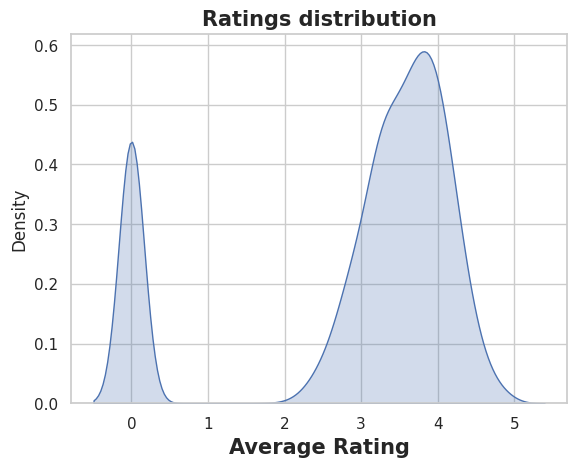

In [33]:
sns.kdeplot(df['aggregate_rating'], shade=True,palette='viridis')
plt.title("Ratings distribution",fontsize=15,fontweight='bold')
plt.xlabel("Average Rating",fontsize=15,fontweight='bold')
plt.show()

* There is a spike at 0 which might account for newly opened or unrated restaurants. 
* most of the restaurant is rated betweeen 3 to 4
* On average, majority of restaurants have rating between 3 to 4 with fewer restaurants managing to go beyond 4


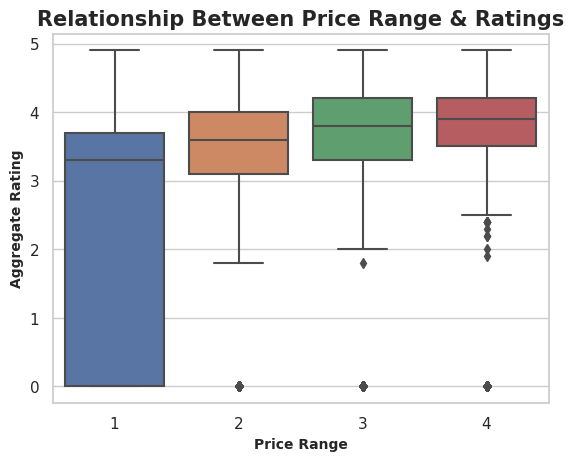

In [34]:
sns.boxplot(x='price_range', y='aggregate_rating', data=df)

plt.title("Relationship Between Price Range & Ratings",fontsize=15,fontweight='bold')
plt.xlabel("Price Range",fontsize=10,fontweight='bold')
plt.ylabel("Aggregate Rating",fontsize=10,fontweight='bold')
plt.show()

* This Boxplot Graph shows restaurants in the lowest price category 1 (50-450) have the highest average rating , around 3.5 on the rating scale 
* As the price range increases from category 1 to category 2, the average rating declines slightly but highest rating touch 4 on the rating scale.
* Restaurants in the highest price range (category 4) have the lowest average rating, with the biggest variation in ratings as indicated by the larger box plot whiskers.
* As the price range increases, the average rating is decreasing.


In [35]:
def check(input_list):
    if 'Delivery' in input_list:
        return 'Delivery Available'
    elif 'Takeaway Available' in input_list:
        return 'Takeaway Available'
    else:
        return 'No Delivery Available'

In [36]:
ff=df['highlights'].apply(check).value_counts().reset_index()
ff

,highlights,count
0,Takeaway Available,24769
1,Delivery Available,23907
2,No Delivery Available,6892


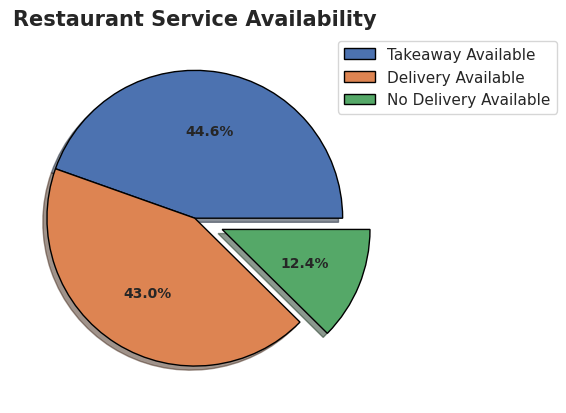

In [37]:
ex=[0.0,0.0,0.2]

plt.pie(ff['count'],explode=ex,autopct="%1.1f%%",shadow=True,radius=1,
        textprops={"fontsize": 10,"fontweight":'bold'},
        wedgeprops={"linewidth":1,"edgecolor" :'black'},rotatelabels=False)
plt.title('Restaurant Service Availability',fontsize=15,fontweight='bold')
plt.legend(labels=ff['highlights'],loc='upper right',bbox_to_anchor=(1.5,1))
plt.show()

* The pie chart shows the Restaurant Service Availability. the pie chart is divided ito three slices.
 
* “Take away Availability”, “Delivery Available” & “no delivery Available”. 
 
* the slice labelled with “Take away Availability” accounts for 44.6% of restaurants. This shows that almost half of the restaurants offering takeaway service.

* The slice labelled with “Delivery Available” accounts for 43.0% of restaurants. This shows that almost half of the restaurants provide Delivery services.

* The slice labelled with “no delivery Available” accounts for 12.4% of restaurants. Are no providing takeaways and delivery services maybe these restaurants are in the category of most expensive restaurants.
 

In [38]:
from wordcloud import WordCloud


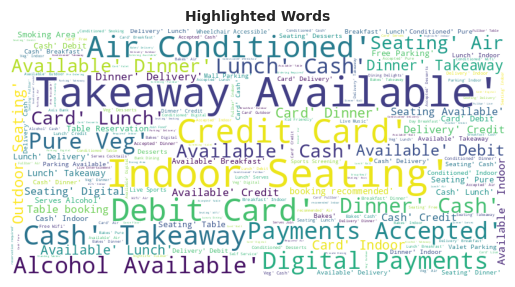

In [39]:

# Sample DataFrame with text data

# Combine text data into a single string
text = ' '.join(df['highlights'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
#plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.title('Highlighted Words',fontsize=10,fontweight='bold')
plt.axis('off')
plt.show()


**Word Cloud** is the visual representation of words which show most frequently used ones and highlighted those words the word cloud. It is used for to identifying key topics, data Exploration
The above Word cloud shows the highlighted words like Takeaway, Debit card, Indoor Seating, Cash, debit card, credit card, pure veg. outdoor seating
Over all its highlight the variety of services offered by the restaurant to make it a convenient dining option for customers.


> # Limitations 


* **Limited Geographic Coverage**: The dataset is covering the only major cities of India. but its reach in smaller towns and rural areas is limited. Its not cover rural areas the Data set mainly focus on urban and big cities 

* **Incomplete Data**: some columns like zip code, cuisines types, timings of restaurants had missing which impact the accuracy of analysis.

* **Outdated Data**: The Dataset is made by Web scrapping and Zomato API and its outdated. Which not reflected the new restaurants, cities it also affects the accuracy of analysis

* **Lack of Additional Features**: The data set have lack of additional features we have no deeper information like restaurant menu from which we can identify most ordered dish. 


> # Future Scope

* **Incorporation of Customer Reviews**: Integrating customer reviews and sentiment analysis help to provide valuable information about the customer preference, satisfaction level which helps the company to make decisions.

* **Business Expansion**: Extending the data collection to other region allows the comparison and facilitate a understanding about restaurant industry in India.

* **Predictive Analysis**: Developing predictive models based on the dataset can help the restaurant owners and entrepreneurs to identify the opportunities in restaurant industry by predictive analysis helps to take decision regarding restaurant location, menu, cuisine offering.

* **Incorporation of Online Ordering and Delivery Data**: The Dataset helps to enhancing delivery service system through analysis. we can find out from which region the maximum orders are coming.


> # Conclusion

**By analysing this dataset we uncovered various insights from the data we find out top 20 cities, top cuisines, price categories, relationship between price and categories. Most expensive restaurants, service availability like take aways available, delivery and no delivery available. these insights provide comprehensive understanding about the restaurant industry in our India which helps to make strategic decisions and also help to our stakeholders to take decisions. Overall These insights provide a comprehensive understanding of the restaurant landscape.
In summary, the analysis provided insights into the characteristics of restaurants across India, including their geographic distribution, establishment types, cuisines, pricing, and delivery/takeaway services. The data cleaning and exploratory analysis highlighted important patterns and trends within the dataset.**
